In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

In [3]:
#Import the data
df = pd.read_csv('hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

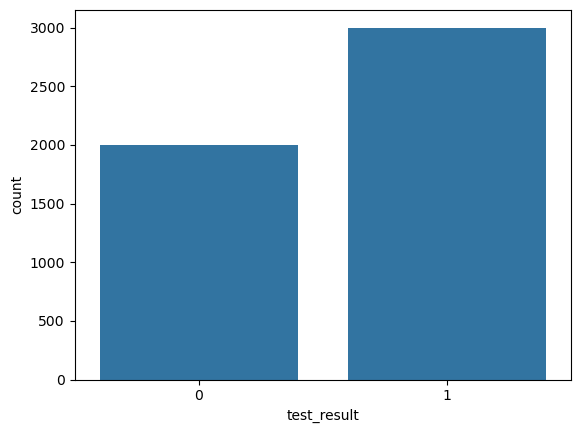

In [9]:
sns.countplot(x='test_result',data=df)

<Axes: xlabel='test_result', ylabel='age'>

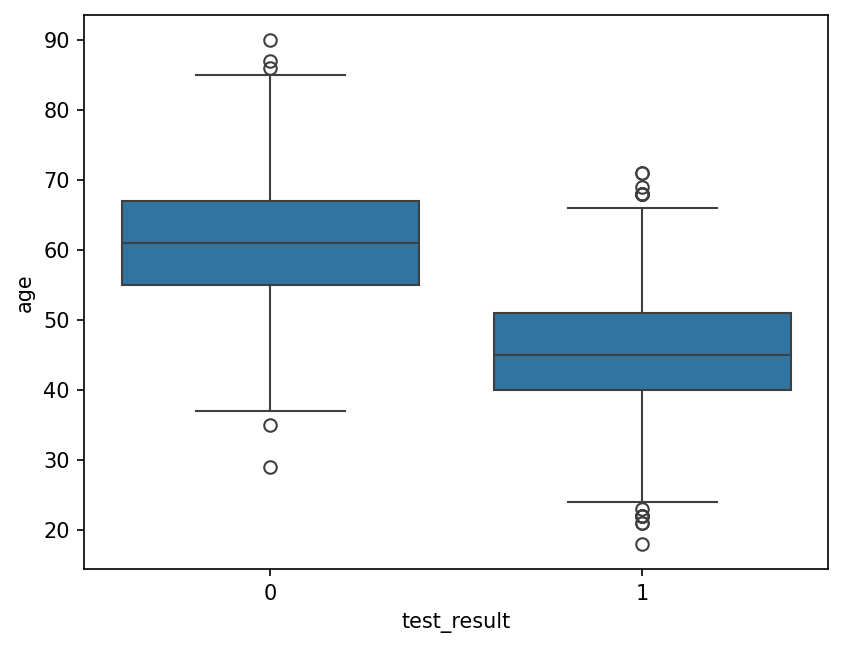

In [12]:
plt.figure(dpi=150)
sns.boxplot(x='test_result',y='age',data=df)

<Axes: xlabel='test_result', ylabel='physical_score'>

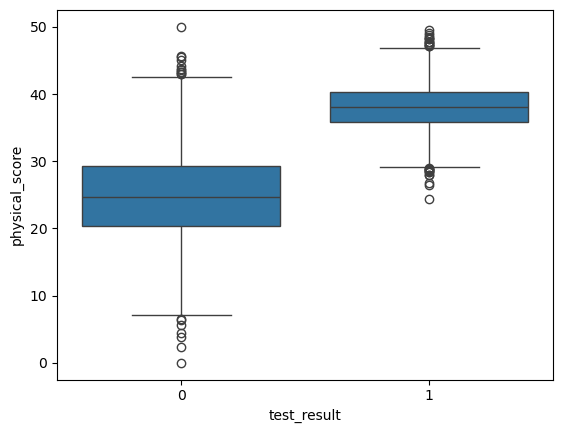

In [17]:
sns.boxplot(x='test_result',y='physical_score',data=df)

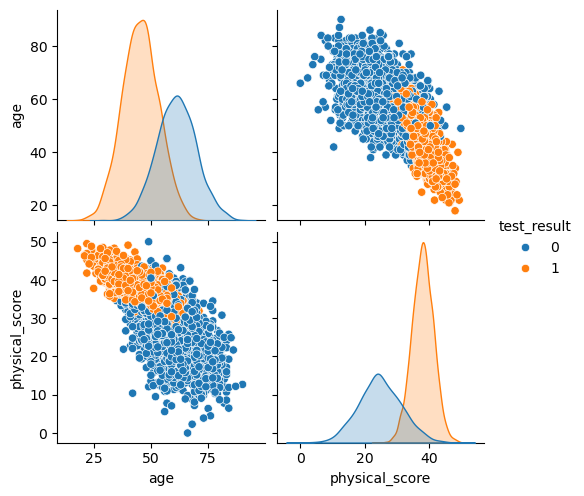

In [49]:
sns.pairplot(df,hue='test_result')

<Axes: xlabel='age', ylabel='physical_score'>

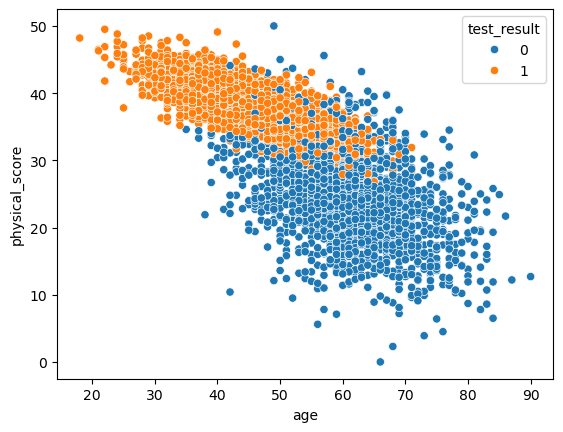

In [40]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result')

<Axes: >

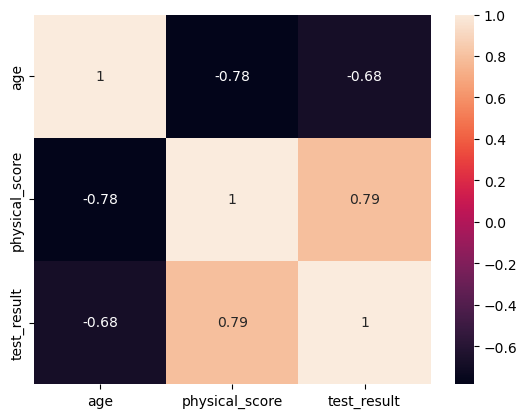

In [50]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

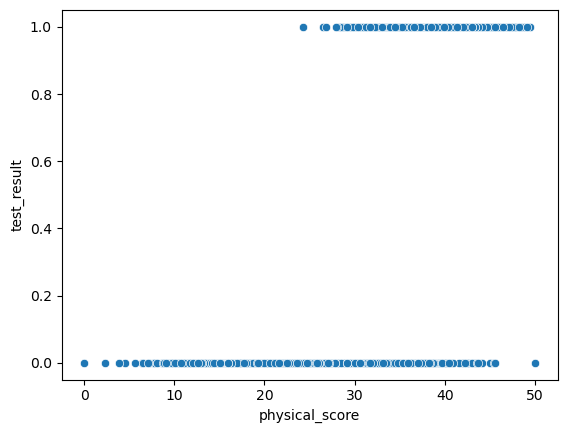

In [51]:
sns.scatterplot(x='physical_score',y='test_result',data=df)

<Axes: xlabel='age', ylabel='test_result'>

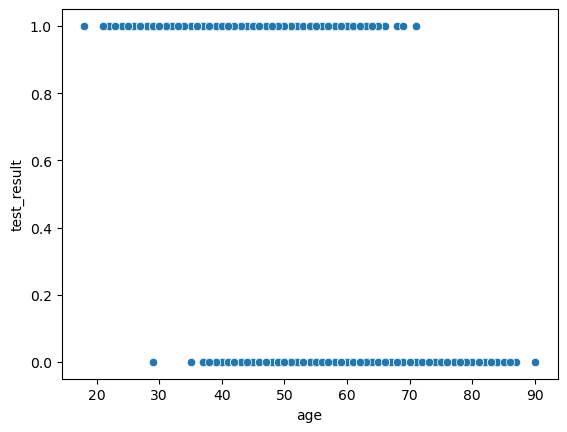

In [52]:
sns.scatterplot(x='age',y='test_result',data=df)

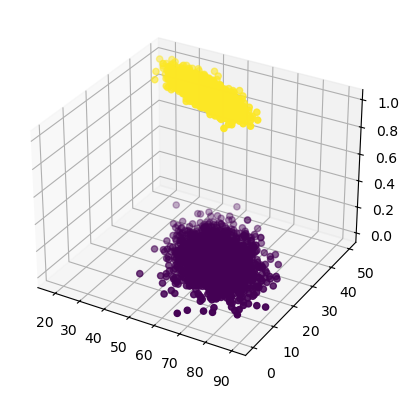

In [53]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

In [20]:
X=df.drop(columns='test_result',axis=1)
y=df['test_result']
print(X)
print(y)

       age  physical_score
0     33.0            40.7
1     50.0            37.2
2     52.0            24.7
3     56.0            31.0
4     35.0            42.9
...    ...             ...
4995  73.0             3.9
4996  57.0            33.9
4997  49.0            34.5
4998  38.0            46.4
4999  48.0            38.5

[5000 rows x 2 columns]
0       1
1       1
2       0
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: test_result, Length: 5000, dtype: int64


In [21]:
from sklearn.model_selection import train_test_split


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [25]:
from sklearn.preprocessing import StandardScaler


In [26]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [27]:
X_train

array([[ 0.64524711, -1.57386326],
       [-0.86200567,  0.7067585 ],
       [ 0.02461361,  0.24082502],
       ...,
       [ 1.17721868, -1.41446497],
       [ 2.77313338, -1.05888415],
       [-1.92594881,  1.17269198]])

In [28]:
from sklearn.linear_model import LogisticRegression   #---->also we LogisticRegressionCV

In [29]:
model=LogisticRegression()#their is hyperparmeter c and other we will use letter
model.fit(X_train,y_train)

LogisticRegression()

In [55]:
model.coef_

array([[-0.89962977,  3.44877023]])

In [56]:
#model Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [57]:
y_test_pred=model.predict(X_test)
y_test_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [58]:
#comparsion table
# Comparison table
# Assuming y_test and y_test_pred are already defined arrays/lists
# Create DataFrame with proper dictionary structure
# Each key in the dictionary should map to a list/array of values
df_comparison = {
    'Actual_value': y_test,     # y_test should be a list/array
    'Predicted_value': y_test_pred  # y_test_pred should be a list/array
}

# Create DataFrame from the dictionary
comparison = pd.DataFrame(df_comparison)

# Display the DataFrame
comparison

,Actual_value,Predicted_value
1718,1,1
2511,1,1
345,0,0
2521,1,1
54,0,0
...,...,...
1254,1,1
3423,1,1
3946,1,1
3299,1,1


In [60]:
accuracy=accuracy_score(y_test,y_test_pred)
recall=recall_score(y_test,y_test_pred)
precesion=precision_score(y_test,y_test_pred)

In [61]:
print(f"accuracy:{accuracy} ")
print(f"Recall:{recall}")
print(f"accuracy:{precesion}")

accuracy:0.92 
Recall:0.9624365482233502
accuracy:0.9089165867689357


In [62]:
confusion_matrix(y_test,y_test_pred)

array([[570,  95],
       [ 37, 948]], dtype=int64)

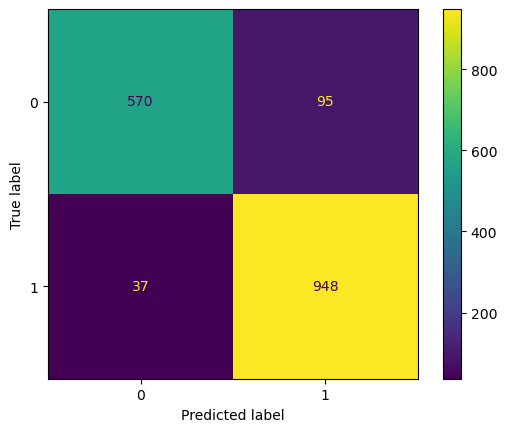

In [63]:
# For scikit-learn version 1.0.0 or newer
from sklearn.metrics import ConfusionMatrixDisplay

# Use the updated function
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [48]:
y_test.shape

(1650,)

In [64]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       665
           1       0.91      0.96      0.93       985

    accuracy                           0.92      1650
   macro avg       0.92      0.91      0.92      1650
weighted avg       0.92      0.92      0.92      1650



## Evaluating Curves and AUC


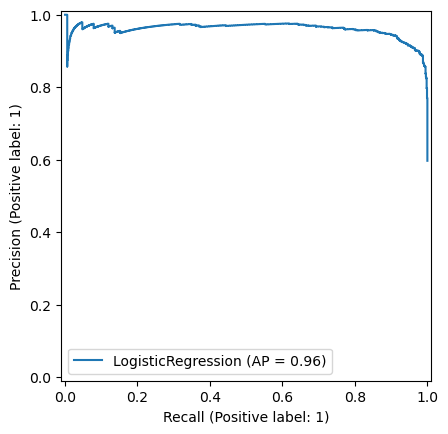

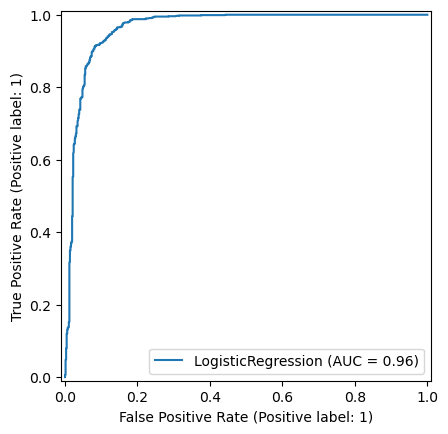

In [80]:
from sklearn.metrics import precision_recall_curve
# For plotting precision-recall curve in newer scikit-learn versions
from sklearn.metrics import PrecisionRecallDisplay
# For plotting ROC curve in newer scikit-learn versions
from sklearn.metrics import RocCurveDisplay

# Example of how to use these in your code:
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
RocCurveDisplay.from_estimator(model, X_test, y_test)